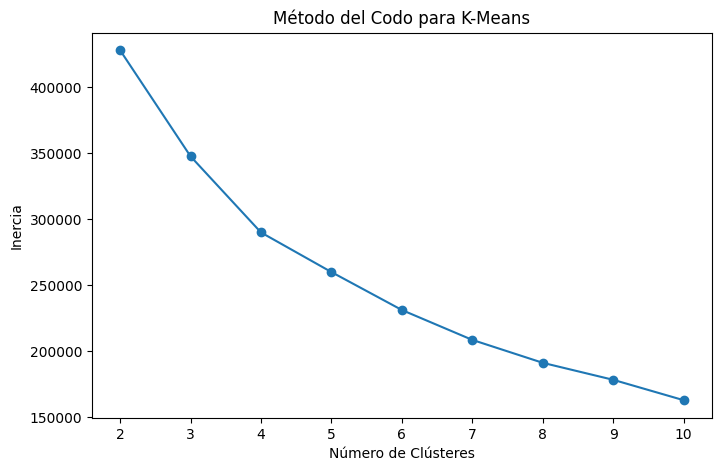

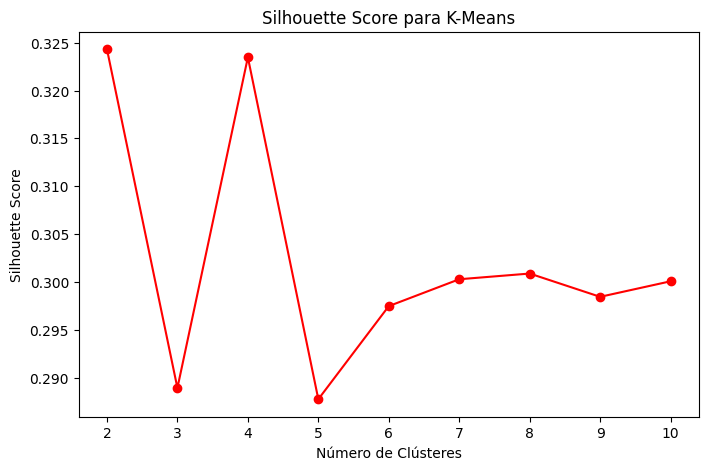

cluster
0    47200
1    22856
2    17732
3     9924
Name: count, dtype: int64


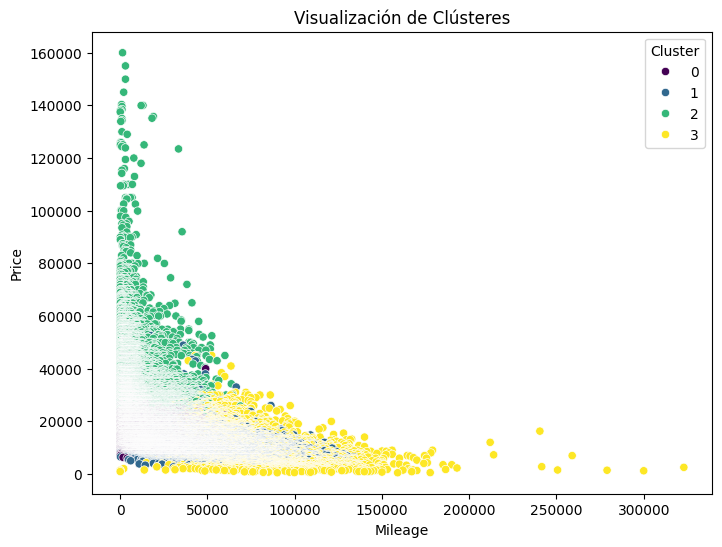

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Cars export 2025-02-05 19-38-54.csv" )

# Selección de características numéricas relevantes
features = ["year", "price", "mileage", "tax", "mpg", "engineSize"]
X = df[features]

# Normalización de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determinar el número óptimo de clústeres con el método del codo
inertia = []
silhouette_scores = []
k_range = range(2, 11)  # Silhouette Score requiere al menos 2 clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.title('Método del Codo para K-Means')
plt.show()

# Graficar Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', color='red')
plt.xlabel('Número de Clústeres')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para K-Means')
plt.show()

# Aplicar K-Means con el número óptimo de clústeres (ajusta según el gráfico)
k_optimo = 4  # Ajusta este valor según el gráfico del codo y Silhouette Score
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_scaled)

# Mostrar distribución de los clústeres
print(df["cluster"].value_counts())

# Visualizar los clústeres con un par de características
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["mileage"], y=df["price"], hue=df["cluster"], palette="viridis")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Visualización de Clústeres")
plt.legend(title="Cluster")
plt.show()

# Guardar el dataset con los clústeres asignados
df.to_csv("Cars_clustered.csv", index=False)


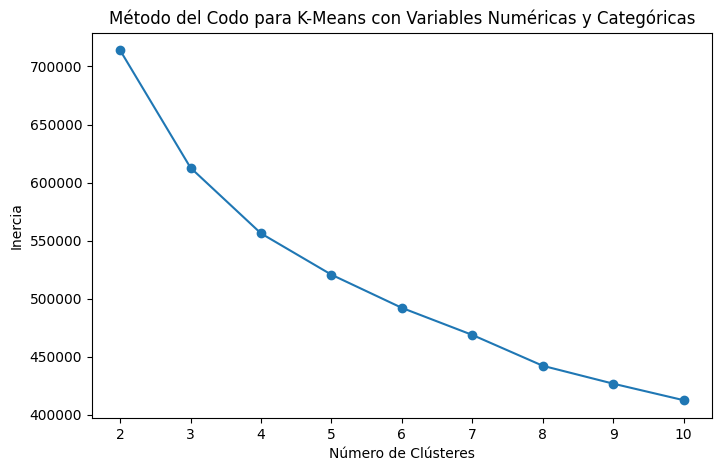

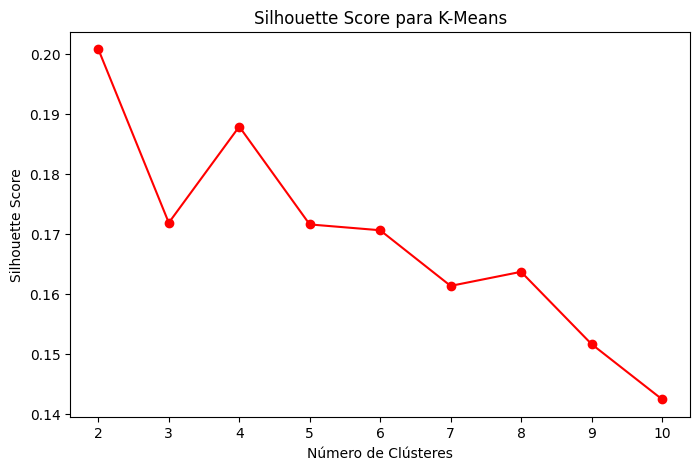

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df = pd.read_csv("Cars export 2025-02-05 19-38-54.csv")

# Separar variables numéricas y categóricas
num_features = df.select_dtypes(include=["number"]).columns.tolist()
cat_features = df.select_dtypes(exclude=["number"]).columns.tolist()

# Preprocesamiento: Normalización para numéricas y OneHotEncoding para categóricas
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown='ignore'), cat_features)
])

# Transformar los datos
X_processed = preprocessor.fit_transform(df)

# Determinar el número óptimo de clústeres con el método del codo
inertia = []
silhouette_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_processed)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_processed, kmeans.labels_))

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.title('Método del Codo para K-Means con Variables Numéricas y Categóricas')
plt.show()

# Graficar Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', color='red')
plt.xlabel('Número de Clústeres')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para K-Means')
plt.show()

#  Tiempo  59 m con 6 seg
